In [1]:
import tifffile as tiff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
from skimage.filters import threshold_otsu
from skimage.morphology import convex_hull_image
from skimage import measure

In [9]:
testimg1 = "test_img/MGAT2_test1.tif"
testimg2 = "test_img/MGAT2_test2.tif"

In [10]:
def loadImage(img_file):
    """Loads open tiff connection to n-dimensional numpy arrays
    """
    with tiff.TiffFile(img_file) as tif:
        images = tif.asarray().astype(float)
    return(images)

In [11]:
df1 = loadImage(testimg1)
df2 = loadImage(testimg2)

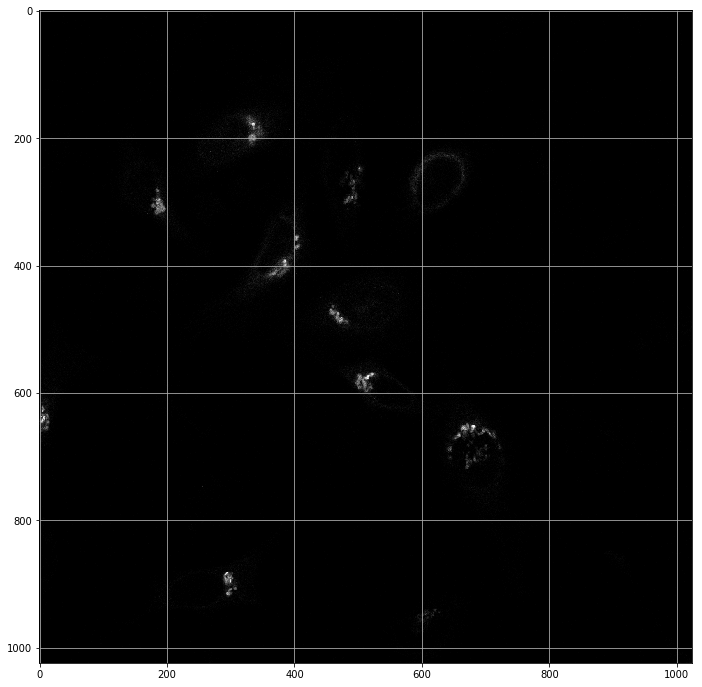

In [12]:
fig = plt.figure(figsize=(12, 12))
plt.imshow(df1[0], cmap="Greys_r")
plt.grid(None)

In [13]:
img = df1[0]

In [14]:
from skimage.filters import gaussian

In [15]:
img_gauss = gaussian(img, sigma=15)

In [16]:
thresh = threshold_otsu(img_gauss)
binary = img_gauss > thresh
contours = measure.find_contours(binary, 0.3)

(-0.5, 1023.5, 1023.5, -0.5)

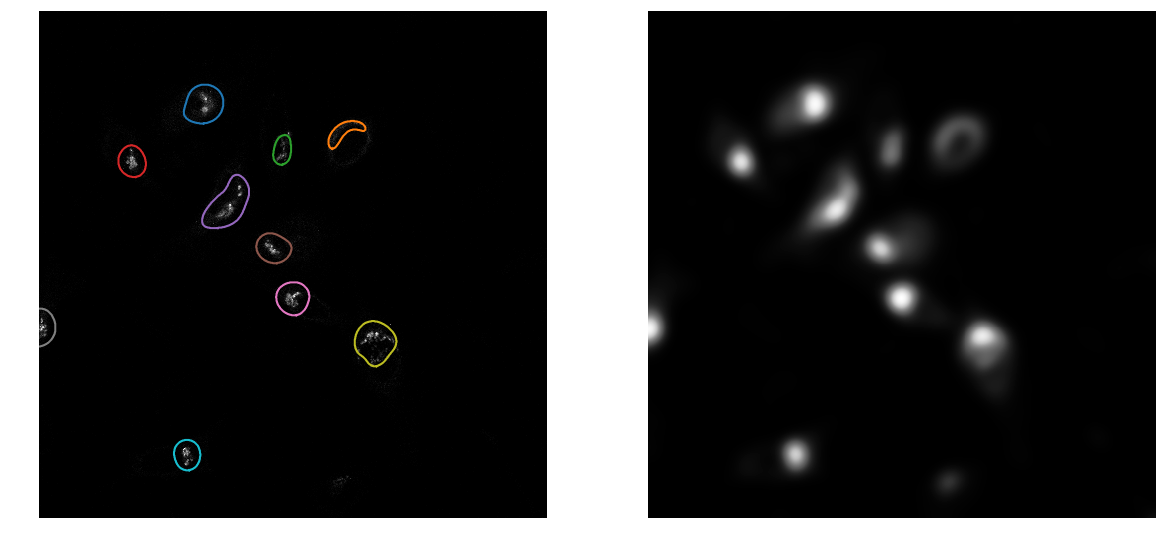

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20,10))
ax1.imshow(img, cmap="Greys_r")
for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax1.axis('off')

ax2.imshow(img_gauss, cmap="Greys_r")
ax2.axis('off')

In [83]:
test_contour = contours[5]

(-0.5, 1023.5, 1023.5, -0.5)

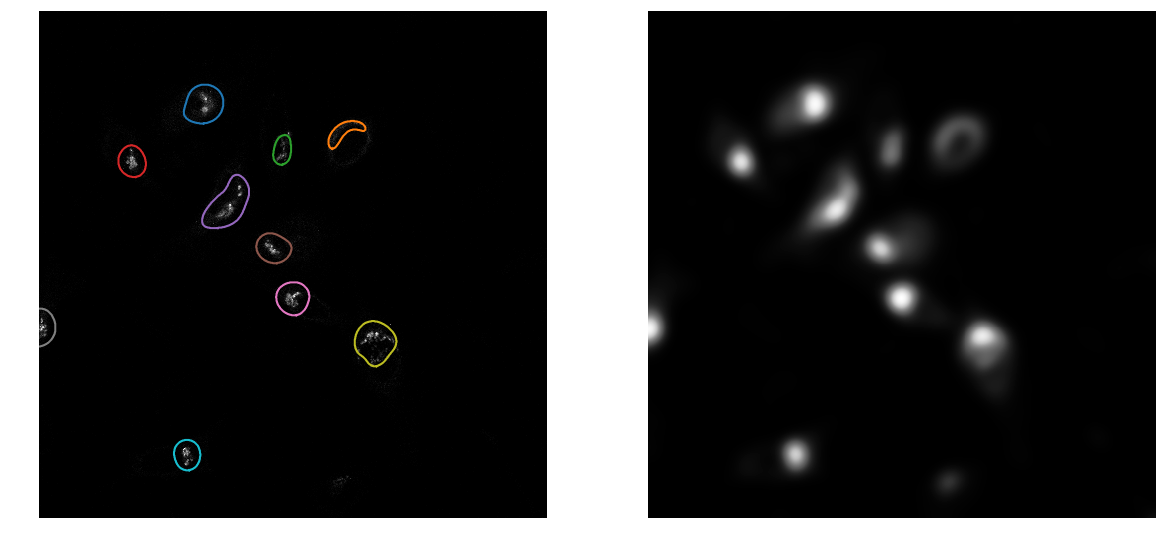

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20,10))
ax1.imshow(img, cmap="Greys_r")

for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax1.axis('off')

ax2.imshow(img_gauss, cmap="Greys_r")
ax2.axis('off')

In [24]:
#from matplotlib import path
from skimage.morphology import convex_hull_image
import math

In [25]:
chull = convex_hull_image(test_contour)

In [27]:
test_contour[:, 0].min()

149.3

In [70]:
def get_min_max(contour):
    ymin = int(round(contour[:, 0].min()))
    ymax = int(round(contour[:, 0].max()))
    xmin = int(round(contour[:, 1].min()))
    xmax = int(round(contour[:, 1].max()))
    return(ymin, ymax, xmin, xmax)

In [41]:
get_min_max(test_contour)

(149.0, 228.0, 291.0, 371.0)

In [75]:
def extractGolgi(orig_img, contour):
    ymin, ymax, xmin, xmax = get_min_max(contour)
    width = int(xmax - xmin)
    height = int(ymax - ymin)
    slices = orig_img.shape[0]
    arr = np.zeros((slices, height, width))
    
    print(ymin, ymax, xmin, xmax)
    
    for i in range(slices):
        arr[i] = orig_img[i][ymin:ymax, xmin:xmax]
     #   arr[i] = orig_img[i]
    
    return arr

In [65]:
df1[0][5:10, 5:10]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [84]:
golgi1 = extractGolgi(df1, test_contour)

449 510 437 509


(-0.5, 71.5, 60.5, -0.5)

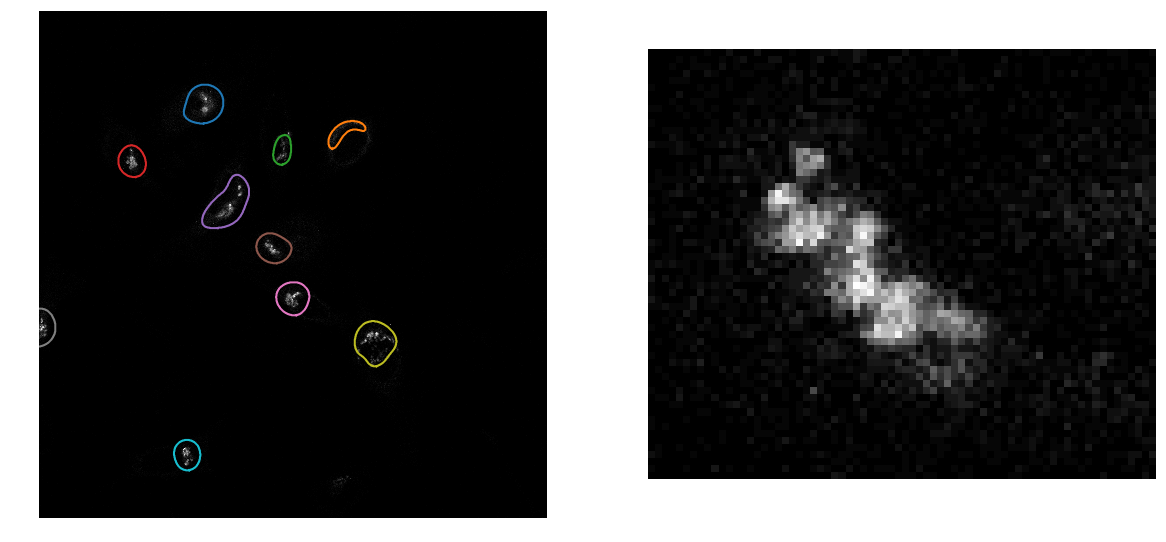

In [85]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20,10))
ax1.imshow(img, cmap="Greys_r")

for n, contour in enumerate(contours):
    ax1.plot(contour[:, 1], contour[:, 0], linewidth=2)
ax1.axis('off')

ax2.imshow(golgi1[1], cmap="Greys_r")
ax2.axis('off')

149 228 291 371
149 228 291 371
149 228 291 371
222 279 583 658
222 279 583 658
222 279 583 658
250 311 471 508
250 311 471 508
250 311 471 508
271 336 159 215
271 336 159 215
271 336 159 215
331 439 328 423
331 439 328 423
331 439 328 423
449 510 437 509
449 510 437 509
449 510 437 509
548 615 477 545
548 615 477 545
548 615 477 545
601 678 0 32
601 678 0 32
601 678 0 32
626 718 636 721
626 718 636 721
626 718 636 721
866 928 271 325
866 928 271 325
866 928 271 325


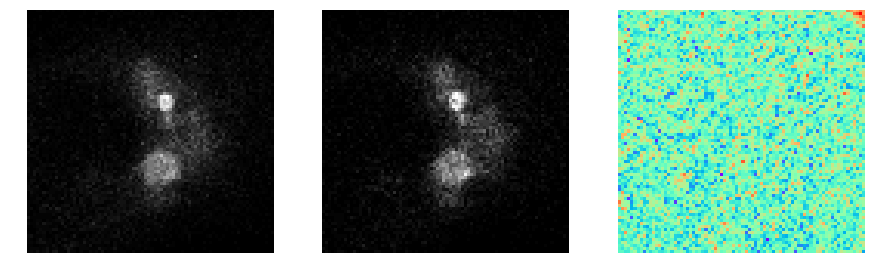

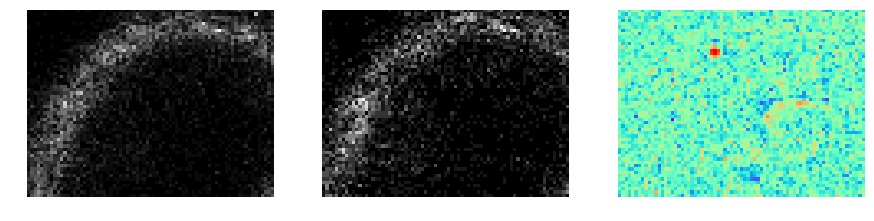

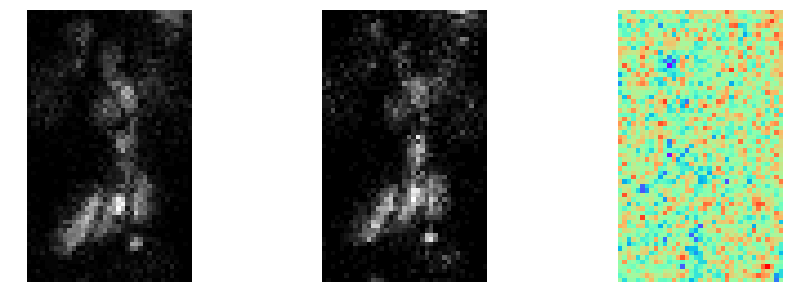

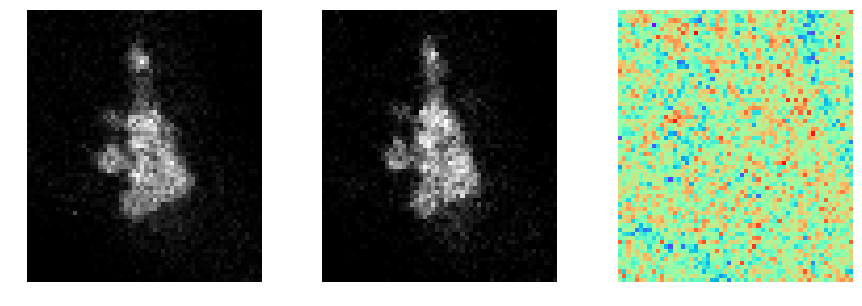

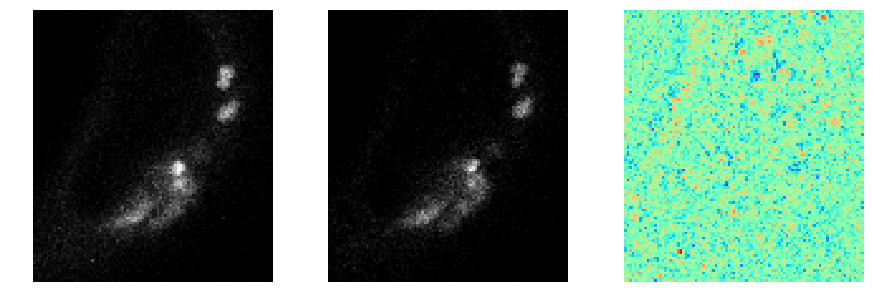

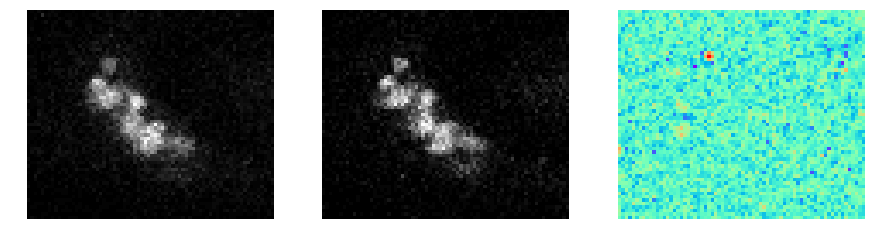

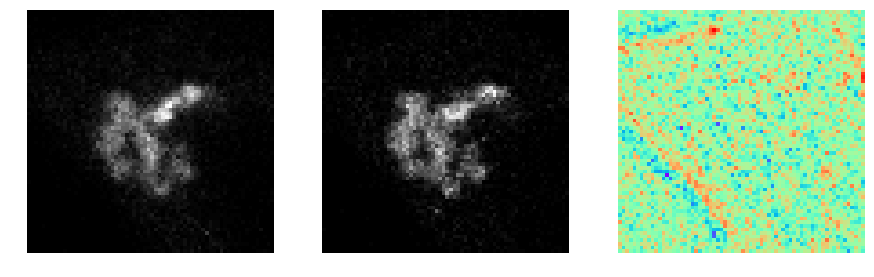

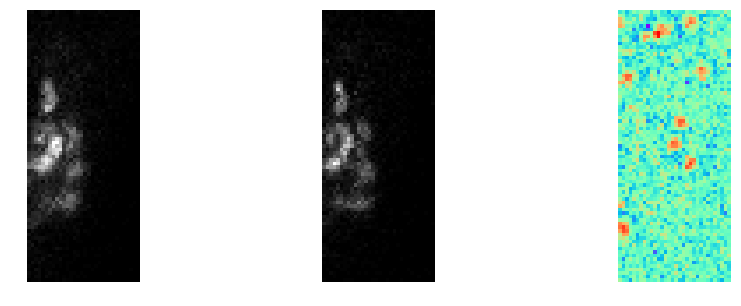

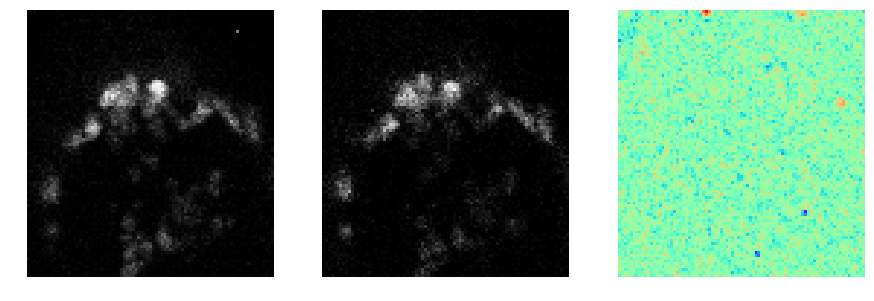

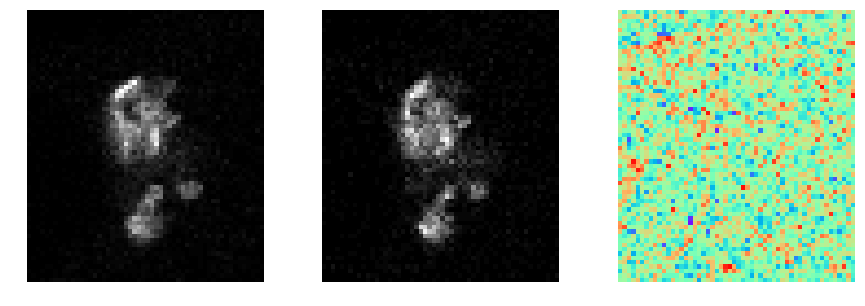

In [92]:
for i in range(len(contours)):
    fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(15,5))
    ax1.imshow(extractGolgi(df1, contours[i])[0], cmap = "Greys_r")
    ax1.axis('off')
    ax2.imshow(extractGolgi(df1, contours[i])[1], cmap = "Greys_r")
    ax2.axis('off')
    ax3.imshow(extractGolgi(df1, contours[i])[2], cmap = "rainbow_r")
    ax3.axis('off')
    

In [51]:
test_arr = np.array([[0, 5, 1, 5, 0], 
         [1, 0, 3, 0, 4]], dtype='float64')

In [52]:
thresh = 2

In [53]:
bind = test_arr < thresh

In [49]:
test_arr[test_arr == 0] = np.nan

In [55]:
test_arr[bind] = np.nan

In [56]:
test_arr

array([[nan,  5., nan,  5., nan],
       [nan, nan,  3., nan,  4.]])

In [31]:
test

array([3, 2, 3, 4])

In [45]:
df1.dtype

dtype('float64')

In [57]:
import re

In [60]:
testy = "Yaaaa"
testn = "n"

if re.match("^[yY]", testy):
    print(testy)


Yaaaa


In [63]:
from os.path import basename

In [66]:
basename("bla.tif").split('.tif')[0]

'bla'